In [5]:
from ursse.path_assistant import PathAssistant as pa
import os

In [3]:
shift = pa("shift_05_26_2021")

In [62]:
file_names = os.listdir(shift.shift_dir)
file_names = sorted([f for f in file_names if '.Wfm.' in f])
off_paths = file_names[:5]
on_paths = file_names[6:]
print(off_paths)
print(on_paths)

['RefCurve_2021-05-26_0_134305.Wfm.bin', 'RefCurve_2021-05-26_1_134406.Wfm.bin', 'RefCurve_2021-05-26_2_134410.Wfm.bin', 'RefCurve_2021-05-26_3_134413.Wfm.bin', 'RefCurve_2021-05-26_4_134429.Wfm.bin']
['RefCurve_2021-05-26_6_134533.Wfm.bin', 'RefCurve_2021-05-26_7_134605.Wfm.bin', 'RefCurve_2021-05-26_8_134636.Wfm.bin', 'RefCurve_2021-05-26_9_134706.Wfm.bin']


In [21]:
LED_off_path = os.path.join(shift.shift_dir, 'RefCurve_2021-05-26_0_134305.Wfm.bin')

In [22]:
LED_on_path = os.path.join(shift.shift_dir, 'RefCurve_2021-05-26_5_134502.Wfm.bin')

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
LED_off = np.fromfile(LED_off_path, np.float32)

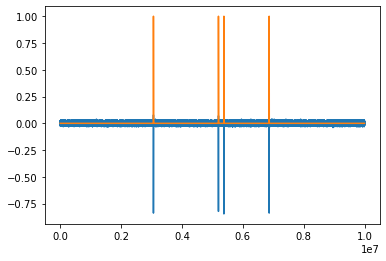

In [53]:
x1, x2 = int(3e7), int(4e7)
plt.plot(LED_off[x1:x2])
d1 = (LED_off < threshold).astype(np.int8)
d2 = np.abs(np.diff(d1))
plt.plot(d2[x1:x2])

In [54]:
13/0.2

65.0

In [55]:
threshold = -0.2
def count_pulses(data):
    d1 = (data < threshold).astype(np.int8)
    d2 = np.abs(np.diff(d1))
    return np.sum(d2)/2
count_pulses(LED_off)

14.0

In [56]:
LED_on = np.fromfile(LED_on_path, np.float32)

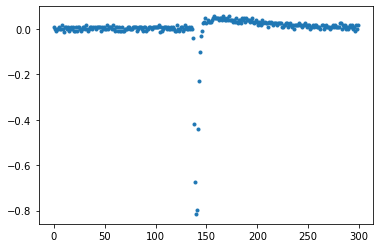

In [57]:
plt.plot(LED_on[58700:59000], '.')

In [58]:
n_LED_on = count_pulses(LED_on)
n_LED_on

81.0

In [59]:
n_LED_on/0.2

405.0

# using all files

In [67]:
off_counts = []
for p in off_paths:
    data = np.fromfile(os.path.join(shift.shift_dir, p), np.float32)
    off_counts.append(count_pulses(data))
off_counts

[14.0, 12.0, 14.0, 14.0, 12.0]

In [69]:
np.mean(off_counts)/0.2

65.99999999999999

In [68]:
on_counts = []
for p in on_paths:
    data = np.fromfile(os.path.join(shift.shift_dir, p), np.float32)
    on_counts.append(count_pulses(data))
on_counts

[62.0, 49.0, 40.0, 24.0]

In [70]:
np.mean(on_counts)/0.2

218.75